# CLIP for Video processing

Adapted from: https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/X-CLIP/Zero_shot_classify_a_YouTube_video_with_X_CLIP.ipynb

# Dataset format

# data format to create

Something along these lines, but this isn't perfect. Use your best judgement.

Each dictionary is a video SEGMENT. 

```python
[
  {
    "youtube_title": "2ZokZgnjrYs",                      
    "youtube_id": "Hawaii Vlog",                         
    "segment_length_seconds": 15.0,
    "captions": "Daniel's chosen format here",           
    "segment_start_time":[<segment_start_times_list>],
    "segment_end_time":[<segment_end_times_list>],     
    "frame_embeddings":[<frame_embeddings_list>],        
    "audio_embeddings":[<audio_embeddings_list>],        
    "text_caption_embeddings":[<text_embeddings_list>],  
    "scene_graph_embeddings":[<scene_graph_embeddings_list>],     
    # "labels": [<labels_list>],                       
  }
]
```

In [1]:
# !pip install -q pytube
import cv2
import numpy as np
import skvideo.io
import os
import time
import random
from operator import itemgetter

In [ ]:
# We want to extract EXACTLY n frames from a video given a start and end time
# We also want to use random sampling if possible (1-30 fps for now)
# def get_frames(video_path, n_frames = 60, words = 15, threshold_words = 30)
#   frame_rate = get_frame_rate(video_path)
#   list_of_start_end_dict = CaptionPreprocessing(video_path)
#   for start_end_dict in list_of_start_end_dict:
#       start, end = start_end_dict['start'], start_end_dict['end']
#       if end - start < n_frames/frame_rate:
#           return ERROR
#       Get random frames

In [ ]:
from video-pretrained-transformer/whisper_audio/CaptionPreprocessing.py import CaptionPreprocessing

In [6]:
# Pranav's CLIP Video Pre-Processing

data_path = "./data/massive_youtube_data/"
test_file = "test_file.mp4"

# Given number of segments and frames per segment, extracts non-overlapping random segments with those frames and save as video
def write_resampled_video(video_reader, resample_name, frames_per_partition=64, num_partitions=5, frame_separation=3, extension=".mp4"):
    num_frames, height, width, channels = video_reader.getShape()

    num_frames_processed_per_partition = (frames_per_partition-1)*frame_separation+frames_per_partition
    partitions = []
    
    all_frames = set([i for i in range(num_frames-num_frames_processed_per_partition-1)])

    for partition in range(num_partitions):
        retry = 0
        no_partition_flag = False
        while True:
            if retry == 5:
                no_partition_flag = True
                break

            # random_start_idx = random.chouce(0, num_frames-num_frames_processed_per_partition-1)

            # TODO: ADD IN CHECK FOR NUMBER OF WORDS IN SEGMENT
            random_start_idx = random.choice(list(all_frames))
            if True:
                partition = set([i for i in range(random_start_idx, random_start_idx+num_frames_processed_per_partition)])
                all_frames = all_frames - partition
                break

            retry += 1
        
        if no_partition_flag:
            break

        frames_in_partition = []
        curr_frame = random_start_idx

        frames_in_partition = list(range(random_start_idx, random_start_idx+num_frames_processed_per_partition, frame_separation+1))

        assert len(frames_in_partition) == frames_per_partition
        
        partitions.append(frames_in_partition)
    
    if len(partitions) < num_partitions:
        print(f"[WARNING] {resample_name} has less than {num_partitions} (number of partitions: {len(partitions)})")

    partitions = sorted(partitions, key=itemgetter(0))

    writer = None
    curr_partition_end = 0
    curr_frame = 0
    frames_to_extract = []
    partition_num = 0

    curr_partition = 0
    writer = skvideo.io.FFmpegWriter(f"{resample_name}_{curr_partition}{extension}")

    for frame in video_reader.nextFrame():
        if curr_frame >= partitions[curr_partition][-1]:
            if writer is not None:
                # print("closedd....")
                writer.close()
                writer = None

            curr_partition += 1
            writer = skvideo.io.FFmpegWriter(f"{resample_name}_{curr_partition}{extension}")
            print(f"{resample_name}_{curr_partition}{extension}")

        if curr_partition >= len(partitions):
            # print("broken")
            break
        
        if curr_frame in partitions[curr_partition]:
            # print("hit")
            writer.writeFrame(frame)
            
        curr_frame += 1


    # if writer is not None:
    #     writer.close()
    
    return

def process_video(video_name):
    video_reader = skvideo.io.FFmpegReader(video_name)
    start = time.time()
    write_resampled_video(video_reader, f"./test", frames_per_partition=64, num_partitions=5, frame_separation=3, extension=".mp4")
    end = time.time() - start
    print(f"[INFO] video took {end} s for resampling")
    video_reader.close()

def process_video_dataset(data_path, extension=".mp4"):
    for f in os.listdir(data_path):
        if f.endswith(extension):
            process_video(os.path.join(data_path, f))
        else:
            continue


process_video(os.path.join(data_path, test_file))



hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
closedd....
./test_1.mp4
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
closedd....
./test_2.mp4
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
closedd....
./test_3.mp4
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
hit
h

## Load video

Here you can provide any YouTube video you like! Just provide the URL :) in my case, I'm providing a YouTube video of Karpathy teaching neural networks.

In [2]:
from pytube import YouTube

# youtube_url = 'https://youtu.be/VMj-3S1tku0'
youtube_url = 'https://www.youtube.com/watch?v=dQw4w9WgXcQ&ab_channel=RickAstley'
yt = YouTube(youtube_url)

streams = yt.streams.filter(file_extension='mp4')
print(streams)

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="25fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="399" mime_type="video/mp4" res="1080p" fps="25fps" vcodec="av01.0.08M.08" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="398" mime_type="video/mp4" res="720p" fps="25fps" vcodec="av01.0.05M.08" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="25fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="397" mime_type="video/mp4" res="480p" fps="25fps" vcodec="av01.0.04M.08" progressive="False" type

In [3]:
len(streams)


16

In [4]:
streams[0]

<Stream: itag="18" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">

In [5]:
file_path = streams[0].download()

In [6]:
file_path

'/home/kastan/thesis/Rick Astley - Never Gonna Give You Up (Official Music Video).mp4'

## Sample frames

The X-CLIP model we'll use expects 32 frames for a given video. Let's sample them:

In [7]:
from decord import VideoReader, cpu
import torch
import numpy as np

from huggingface_hub import hf_hub_download

np.random.seed(0)

def sample_frame_indices(clip_len, frame_sample_rate, seg_len):
    converted_len = int(clip_len * frame_sample_rate)
    end_idx = np.random.randint(converted_len, seg_len)
    start_idx = end_idx - converted_len
    indices = np.linspace(start_idx, end_idx, num=clip_len)
    indices = np.clip(indices, start_idx, end_idx - 1).astype(np.int64)
    return indices

videoreader = VideoReader(file_path, num_threads=1, ctx=cpu(0))

# sample 32 frames
videoreader.seek(0)
indices = sample_frame_indices(clip_len=32, frame_sample_rate=4, seg_len=len(videoreader))
video = videoreader.get_batch(indices).asnumpy()

/home/kastan/utils/miniconda3/envs/nlp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
video.shape

(32, 360, 640, 3)

Let's visualize the first of the 32 frames!

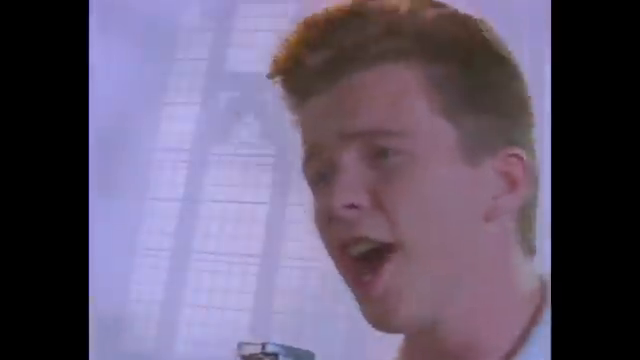

In [11]:
from PIL import Image

Image.fromarray(video[0])

## Load X-CLIP model

Let's instantiate the XCLIP model, along with its processor.

In [13]:
from transformers import XCLIPProcessor, XCLIPModel

model_name = "microsoft/xclip-base-patch16-zero-shot"
processor = XCLIPProcessor.from_pretrained(model_name)
model = XCLIPModel.from_pretrained(model_name)

## Zero-shot classification

Usage of X-CLIP is identical to CLIP: you can feed it a bunch of texts, and the model determines which ones go best with the video.

In [14]:
import torch

inputs = processor(text=["programming course", "rick roll", "eating spaghetti", "playing football"], videos=list(video), return_tensors="pt", padding=True)

# forward pass
with torch.no_grad():
    outputs = model(**inputs)

probs = outputs.logits_per_video.softmax(dim=1)
list(probs.cpu().numpy()[0])

[0.0056400406, 0.99170333, 0.00048422345, 0.0021724228]

In [16]:
from transformers import XCLIPTextModel, XCLIPTextConfig, XCLIPImageModel

# Initializing a XCLIPTextModel with microsoft/xclip-base-patch32 style configuration
configuration = XCLIPTextConfig()

# Initializing a XCLIPTextConfig from the microsoft/xclip-base-patch32 style configuration
model = XCLIPImageModel(configuration)

# Accessing the model configuration
configuration = model.config

ImportError: cannot import name 'XCLIPImageModel' from 'transformers' (/home/kastan/utils/miniconda3/envs/nlp/lib/python3.8/site-packages/transformers/__init__.py)

: 

In [24]:
configuration

XCLIPTextConfig {
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "dropout": 0.0,
  "eos_token_id": 2,
  "hidden_act": "quick_gelu",
  "hidden_size": 512,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 2048,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 77,
  "model_type": "xclip_text_model",
  "num_attention_heads": 8,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "transformers_version": "4.23.0",
  "vocab_size": 49408
}

In [ ]:
# this is from AI Summer blogpost. 

def preprocess_images(examples):

    images = examples['img']
    images = [np.array(image, dtype=np.uint8) for image in images]
    images = [np.moveaxis(image, source=-1, destination=0) for image in images]
    inputs = feature_extractor(images=images)
    examples['pixel_values'] = inputs['pixel_values']

    return examples

from datasets import Features, ClassLabel, Array3D

features = Features({
    'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']),
    'img': Array3D(dtype="int64", shape=(3,32,32)),
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
})

preprocessed_train_ds = train_ds.map(preprocess_images, batched=True, features=features)
preprocessed_val_ds = val_ds.map(preprocess_images, batched=True, features=features)
preprocessed_test_ds = test_ds.map(preprocess_images, batched=True, features=features)